In [1]:
import numpy as np
import ot  
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt

# Generate Data for Classes
def generate_mixed_distribution_data():
    """
    Generate 9 classes: 
    - Classes 1-5: Normal distributions with varying mean and variance.
    - Classes 6-9: Exponential distributions with varying rate parameters.
    """
    data = {}
    sequence_length = 50  # Fixed length for each sample
    
    # Normal Distributions for Classes 1-5
    for i in range(1, 6):
        mean = np.random.uniform(2, 3)  
        std = np.random.uniform(0.5, 0.6)  
        n_samples = np.random.randint(11, 19)  
        class_data = [np.random.normal(mean, std, sequence_length) for _ in range(n_samples)]
        data[f'class_{i} (Normal μ={mean:.2f}, σ={std:.2f})'] = np.array(class_data)
    
    # Exponential Distributions for Classes 6-9
    for i in range(6, 10):
        rate = np.random.uniform(1, 1.1)  
        n_samples = np.random.randint(11, 19)  
        class_data = [np.random.exponential(1/rate, sequence_length) for _ in range(n_samples)]
        data[f'class_{i} (Exponential λ={rate:.2f})'] = np.array(class_data)
    
    return data

In [2]:
# Compute Gromov-Wasserstein Distance Between Two Classes
def gromov_wasserstein_distance_class_pair(class_data_1, class_data_2):
    """
    Compute Gromov-Wasserstein distance between two classes with fixed-length sequences.
    """
    # Compute pairwise ground distance matrices for each class
    C1 = cdist(class_data_1, class_data_1, metric='euclidean')
    C2 = cdist(class_data_2, class_data_2, metric='euclidean')
    
    a = np.ones(len(class_data_1)) / len(class_data_1)
    b = np.ones(len(class_data_2)) / len(class_data_2)
    
    # Compute Gromov-Wasserstein distance
    start_time = time.time()
    gw_distance = ot.gromov.gromov_wasserstein2(C1, C2, a, b, 'square_loss')
    end_time = time.time()
    
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    return gw_distance


# Compute Distance Matrix Between All Classes
def compute_distance_matrix(data):
    """
    Compute pairwise Gromov-Wasserstein distances between all classes.
    """
    class_names = list(data.keys())
    n_classes = len(class_names)
    distance_matrix = np.zeros((n_classes, n_classes))
    
    for i in range(n_classes):
        for j in range(i + 1, n_classes):
            distance = gromov_wasserstein_distance_class_pair(data[class_names[i]], data[class_names[j]])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Symmetric matrix
    
    return distance_matrix, class_names


# Visualization
def plot_distance_matrix(distance_matrix, class_names):
    """
    Plot a heatmap of the Gromov-Wasserstein distance matrix.
    """
    plt.figure(figsize=(12, 10))
    plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Gromov-Wasserstein Distance')
    plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
    plt.title('Gromov-Wasserstein Distance Between Classes')
    plt.tight_layout()
    plt.show()



In [3]:
np.random.seed(42) 
# Generate Data
toy_data = generate_mixed_distribution_data()

for class_name, class_data in toy_data.items():
    print(f"{class_name}: {len(class_data)} samples")


class_1 (Normal μ=2.37, σ=0.60): 13 samples
class_2 (Normal μ=2.61, σ=0.54): 15 samples
class_3 (Normal μ=2.74, σ=0.55): 15 samples
class_4 (Normal μ=2.46, σ=0.56): 16 samples
class_5 (Normal μ=2.01, σ=0.58): 15 samples
class_6 (Exponential λ=1.08): 11 samples
class_7 (Exponential λ=1.04): 11 samples
class_8 (Exponential λ=1.00): 13 samples
class_9 (Exponential λ=1.09): 17 samples


In [4]:
distance_matrix, class_names = compute_distance_matrix(toy_data)

Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds


In [5]:
distance_matrix

array([[ 0.        ,  1.81531616,  1.45695947,  1.7899337 ,  1.46025831,
         8.00339636, 13.22336838, 13.10569827, 11.39483416],
       [ 1.81531616,  0.        ,  0.31854929,  0.60350281,  0.36083107,
        13.1321279 , 19.74122177, 20.72276212, 14.9143999 ],
       [ 1.45695947,  0.31854929,  0.        ,  0.62258747,  0.30586533,
        11.61696013, 17.73209272, 18.53845294, 12.99812186],
       [ 1.7899337 ,  0.60350281,  0.62258747,  0.        ,  0.67766233,
        11.78896544, 17.88677184, 19.47043162, 13.00723179],
       [ 1.46025831,  0.36083107,  0.30586533,  0.67766233,  0.        ,
        10.87235622, 17.05076081, 18.07139776, 12.68741718],
       [ 8.00339636, 13.1321279 , 11.61696013, 11.78896544, 10.87235622,
         0.        ,  1.61164968,  4.83630632,  5.24920005],
       [13.22336838, 19.74122177, 17.73209272, 17.88677184, 17.05076081,
         1.61164968,  0.        ,  4.11660248,  5.59082743],
       [13.10569827, 20.72276212, 18.53845294, 19.47043162, 18

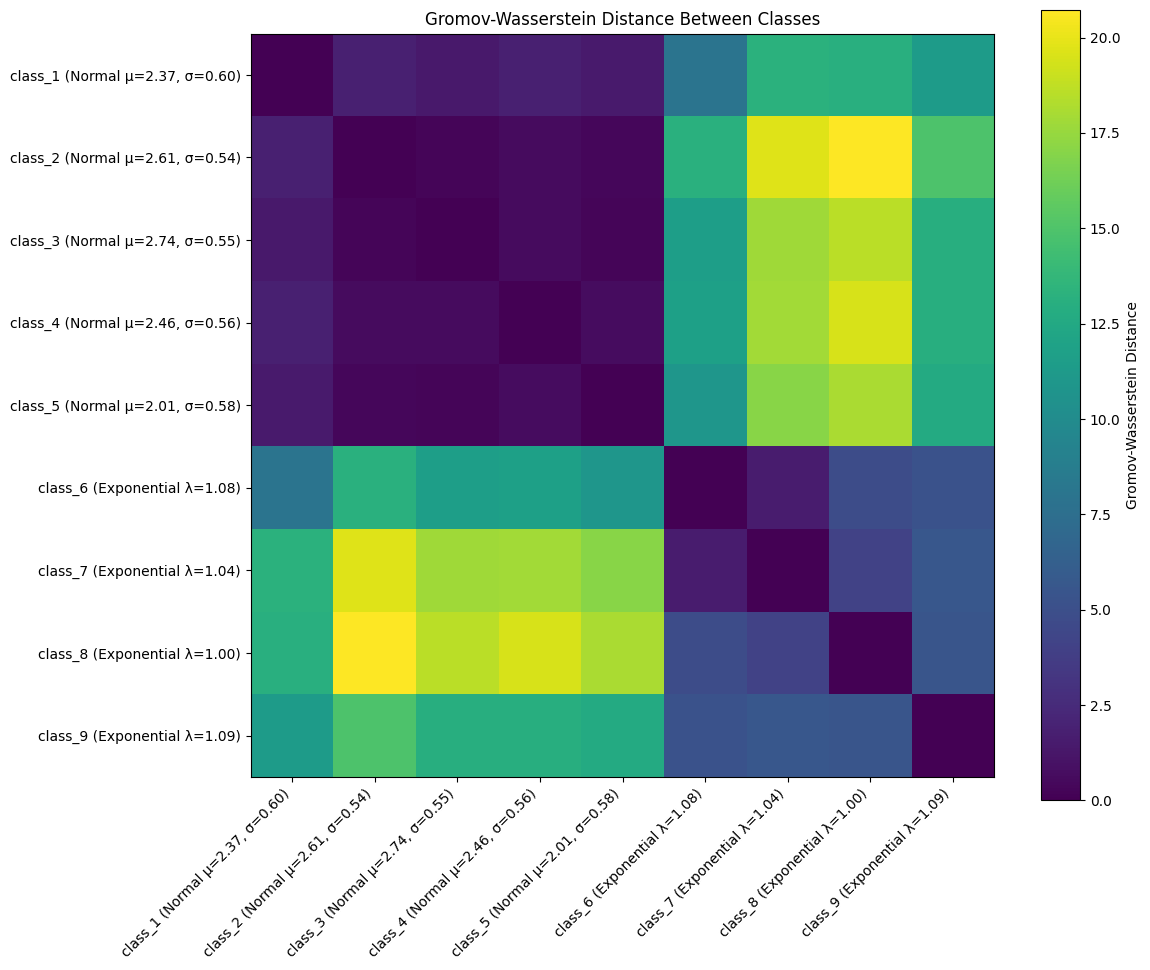

In [6]:
plot_distance_matrix(distance_matrix, class_names)